In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
from scipy.interpolate import splrep, splev

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def func(xy, a, b, c, d, e, f): 
    x, y =  xy
    return a + b*x + c*y + d*x**2 + e*y**2 + f*x*y
# Your list of poses
poses = [
    np.array([0.78726253,  0.34454266, -0.71004344]),
    np.array([0.76453513,  0.34536993, -0.70425916]),
    np.array([0.72300046,  0.35044268, -0.70193804]),
    np.array([0.7027234 ,  0.35031719, -0.6948665]),
    np.array([0.68187972,  0.35343439, -0.69521656]),
    np.array([0.66169145,  0.35416544, -0.69135061]),
]

# Extract x, y, z values for each pose
x, y, z = zip(*poses)

x = np.array(x)
y = np.array(y)
z = np.array(z)
        # print('data x', type(x), x)
        # print('(x, y)', (x, y), type((x, y)))
popt, pcov = curve_fit(func, (x, y), z) 
        # Print optimized parameters 
        # print(popt)
        
                # Extract the fitted parameters
a, b, c, d, e, f = popt

        # Limit the range of values for plotting
x_range = np.linspace(min(x), max(x), 100)
y_range = np.linspace(min(y), max(y), 100)
xx, yy = np.meshgrid(x_range, y_range)

fitted_surface = func((xx, yy), a, b, c, d, e, f)
fitted_surface


/home/hanglok/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([[-1.00157678, -0.99499773, -0.98849285, ..., -0.70873863,
        -0.70935395, -0.71004344],
       [-0.99532678, -0.9888151 , -0.98237758, ..., -0.70902323,
        -0.70970592, -0.71046278],
       [-0.98914039, -0.98269607, -0.97632592, ..., -0.70937144,
        -0.71012149, -0.71094571],
       ...,
       [-0.6914486 , -0.69140415, -0.69143387, ..., -1.03246672,
        -1.03961664, -1.04684073],
       [-0.69136781, -0.69139072, -0.69148781, ..., -1.03892052,
        -1.04613781, -1.05342927],
       [-0.69135061, -0.69144089, -0.69160534, ..., -1.04543792,
        -1.05272258, -1.0600814 ]])

Fitted Parameters: a = 0.24150529467262224, b = -2.6266048582721297, c = 0.04468179185459623, d = -2.3095642385966135, e = 0.0036475282906474516, f = -0.7087312057289318


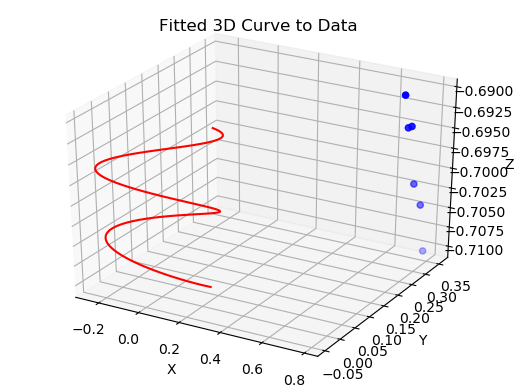

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

# Your list of poses


# Define a 3D curve function
def curve_function(t, a, b, c, d, e, f):
    x = a * np.cos(b * t)
    y = c * np.sin(d * t)
    z = e * t + f
    return np.column_stack((x, y, z)).flatten()

# Parametrize the curve with t (you can choose a suitable range)
t = np.linspace(0, 5, len(x))

# Perform the fit using curve_fit
params, covariance = curve_fit(curve_function, t, np.column_stack((x, y, z)).flatten())

# Extract the fitted parameters
a, b, c, d, e, f = params

# Print the fitted parameters
print(f"Fitted Parameters: a = {a}, b = {b}, c = {c}, d = {d}, e = {e}, f = {f}")

# Evaluate the curve over a finer range
t_fine = np.linspace(min(t), max(t), 100)
curve_fine = np.array([curve_function(ti, a, b, c, d, e, f) for ti in t_fine])

# Plot the data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='blue', marker='o', label='Data')

# Plot the fitted curve
ax.plot(curve_fine[:, 0], curve_fine[:, 1], curve_fine[:, 2], color='red', label='Fitted Curve')

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot title
ax.set_title('Fitted 3D Curve to Data')

# Show the plot
plt.show()

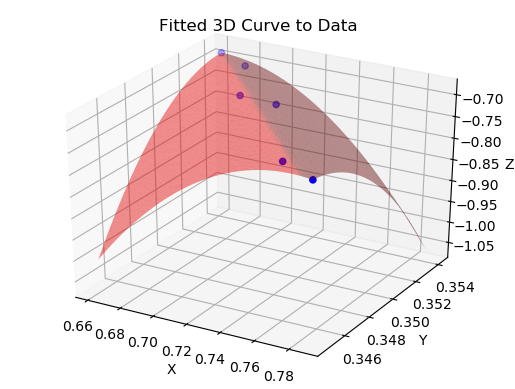

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(xy, a, b, c, d, e, f):
    x, y = xy
    return a + b * x + c * y + d * x**2 + e * y**2 + f * x * y

# Your list of poses
poses = [
    np.array([0.78726253, 0.34454266, -0.71004344]),
    np.array([0.76453513, 0.34536993, -0.70425916]),
    np.array([0.72300046, 0.35044268, -0.70193804]),
    np.array([0.7027234, 0.35031719, -0.6948665]),
    np.array([0.68187972, 0.35343439, -0.69521656]),
    np.array([0.66169145, 0.35416544, -0.69135061]),
]

# Extract x, y, z values for each pose
x, y, z = zip(*poses)

x = np.array(x)
y = np.array(y)
z = np.array(z)

# Perform the curve fit
popt, pcov = curve_fit(func, (x, y), z)

# Extract the fitted parameters
a, b, c, d, e, f = popt

# Limit the range of values for plotting
x_range = np.linspace(min(x), max(x), 100)
y_range = np.linspace(min(y), max(y), 100)
xx, yy = np.meshgrid(x_range, y_range)

# Predict z values using the fitted function
fitted_surface = func((xx, yy), a, b, c, d, e, f)

# Plot the 3D curve with scatter points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for data points
ax.scatter(x, y, z, c='blue', marker='o', label='Data Points')

# Smooth curve for the fitted surface
ax.plot_trisurf(xx.flatten(), yy.flatten(), fitted_surface.flatten(), color='red', alpha=0.5, label='Fitted Curve')

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot title
ax.set_title('Fitted 3D Curve to Data')

# Show the plot
plt.show()



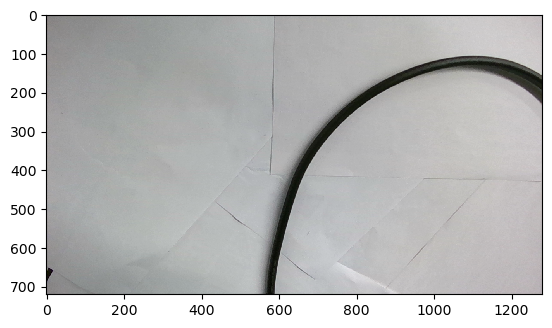

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from realsense_img import ros_camera

rl_cam = ros_camera(node_name='segment')
image = rl_cam.get_image()

plt.imshow(image)
plt.show()

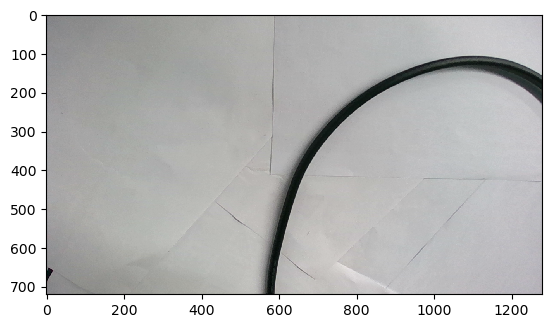

In [5]:


nemo = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()


In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
whale_hsv = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(whale_hsv)

pixel_colors = whale_hsv.reshape((np.shape(whale_hsv)[0]*np.shape(whale_hsv)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()


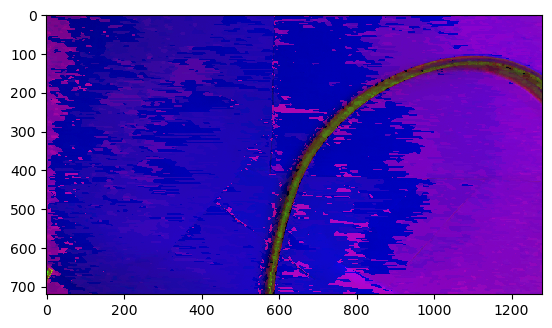

In [7]:
h, s, v = cv2.split(whale_hsv)

plt.imshow(whale_hsv)
plt.show()

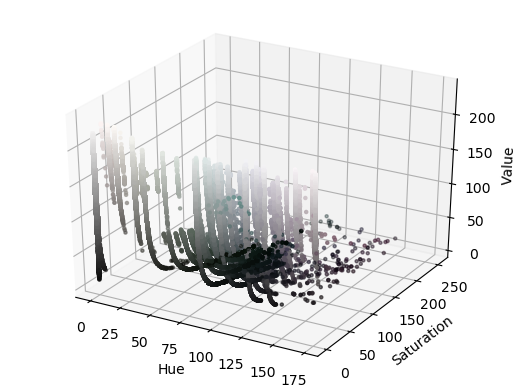

In [14]:

hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

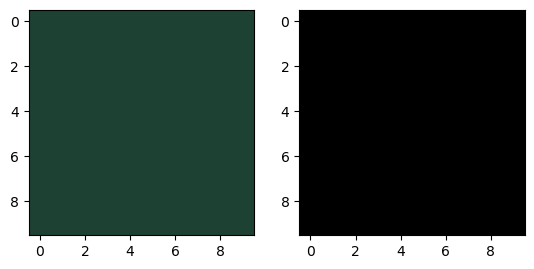

In [56]:
# light_orange = (104.473, 145.164, 252.965)
# # dark_orange = (25.0505, 103.744, 3.34832)
# # dark_orange = (112.316, 59.9045, 231.806)
# dark_orange = (109.126, 43.069, 232.615)
# Define the range for black in HSV
# Define the range for black in HSV
lower_black = np.array([25, 0, 0], dtype=np.uint8)
upper_black = np.array([110, 140, 65], dtype=np.uint8)

from matplotlib.colors import hsv_to_rgb
lo_square = np.full((10, 10, 3), lower_black, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), upper_black, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

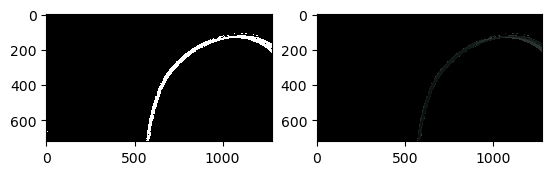

In [57]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv_nemo, lower_black, upper_black)
result = cv2.bitwise_and(nemo, nemo, mask=mask)

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()


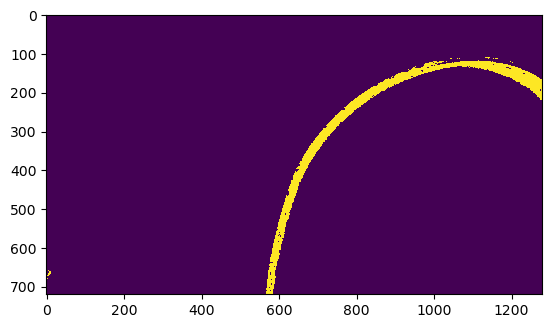

In [58]:
# Convert the result to a binary image
_, binary_result = cv2.threshold(cv2.cvtColor(result, cv2.COLOR_RGB2GRAY), 1, 255, cv2.THRESH_BINARY)

# Display the images
plt.imshow(binary_result)

plt.show()

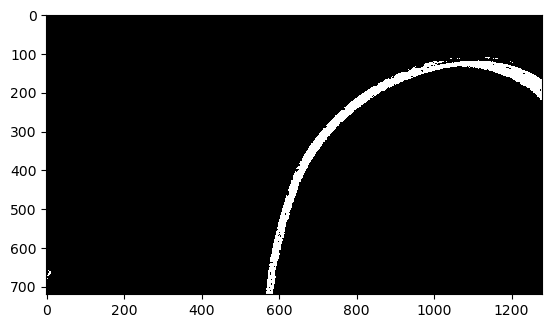

In [59]:
gray_image = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
(thresh, binary_image) = cv2.threshold(gray_image, 1, 255, cv2.THRESH_BINARY)

# Convert the result to a binary image
_, binary_result = cv2.threshold(cv2.cvtColor(result, cv2.COLOR_RGB2GRAY), 1, 255, cv2.THRESH_BINARY)
binary_result[binary_result > 0] = 255
# Display the images
plt.imshow(binary_image, cmap='gray')

plt.show()



kernel: [[0 1 0]
 [1 1 1]
 [0 1 0]]


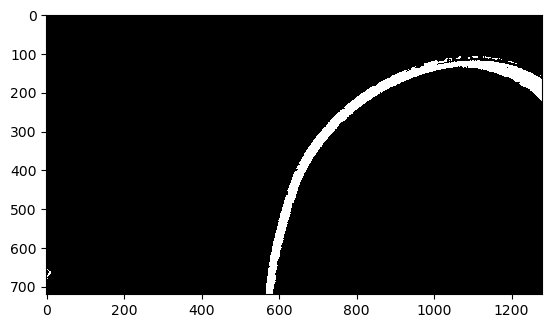

In [60]:
# Create a structuring element (3x3 kernel)
# Create a custom structuring element (cross-shaped kernel)
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)
print('kernel:', kernel)
# Apply dilation
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
plt.imshow(dilated_image, cmap='gray')

plt.show()

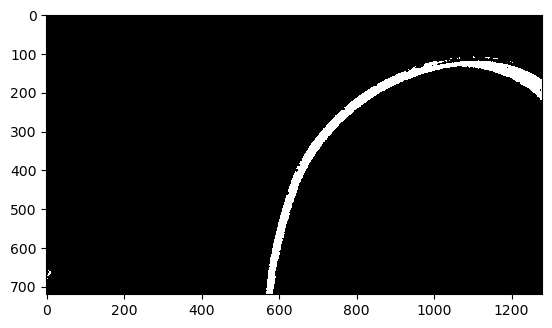

In [61]:
# Apply erosion
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

plt.imshow(eroded_image, cmap='gray')

plt.show()

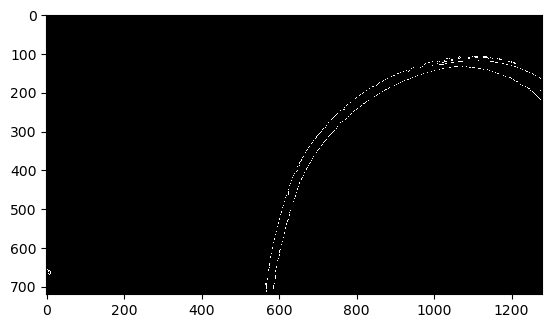

In [62]:
# Image preprocessing
blurred = cv2.GaussianBlur(eroded_image, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)
plt.imshow(edges, cmap='gray')

plt.show()